In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime as dt

In [5]:
if (os.getcwd().endswith("dataset_analysis")):
    os.chdir("./../../")
print(os.getcwd())

/mnt/sdc3/david/projs/kdd1_proj_2023


In [6]:
# get 'uk_universities.csv' from https://www.kaggle.com/datasets/mayureshkoli/best-universities-in-the-united-kingdom 

df_ground_truth = pd.read_csv("./data/uk_universities.csv")
df_cleaned = pd.read_csv("./data/01_cleaning/Universities_cleaned_deduplicated.csv")
df_preprocessed_mean = pd.concat([pd.read_csv("./data/03_imputation/Universities_train_mean_imputed.csv"), pd.read_csv("./data/03_imputation/Universities_test_mean_imputed.csv")])
df_preprocessed_median = pd.concat([pd.read_csv("./data/03_imputation/Universities_train_median_imputed.csv"), pd.read_csv("./data/03_imputation/Universities_test_median_imputed.csv")])
df_preprocessed_mix = (pd.read_csv("./data/03_imputation/Universities_mixed_imputed.csv"))

FileNotFoundError: [Errno 2] No such file or directory: './data/uk_universities.csv'

In [ ]:
def cleaning(df):
    # correction of "9999" to "" in the founded year column
    df["Founded_year"].mask(df["Founded_year"] > dt.datetime.now().year, None, inplace=True)

    # conversion of percentage to float
    df["International_students"] = df["International_students"].str.rstrip("%").astype("float") / 100
    df["Student_satisfaction"] = df["Student_satisfaction"].str.rstrip("%").astype("float") / 100

    # drop duplicates
    df.drop_duplicates(keep="first", inplace=True)

display(df_ground_truth[["International_students", "Student_satisfaction"]].head())
cleaning(df_ground_truth)
display(df_ground_truth[["International_students", "Student_satisfaction"]].head())


,International_students,Student_satisfaction
0,20.20%,85.50%
1,16.80%,86.50%
2,40.40%,87.90%
3,41.40%,77.90%
4,22.00%,85.80%


,International_students,Student_satisfaction
0,0.202,0.855
1,0.168,0.865
2,0.404,0.879
3,0.414,0.779
4,0.220,0.858


In [ ]:
def display_info(df_list):
    df_info = pd.DataFrame()
    for df in df_list:
        tmp = pd.DataFrame({
            'total': (df.shape[0]),
            'non-na': df.count(),
            'na_count': (df.isna().sum()),
            'unique_count': (df.nunique()),
        })
        df_info = pd.concat([df_info, tmp], axis=1)
        
    # df_out.columns = list(range(len(df_out.columns)))
    print(df.shape)
    display(df_info)

def display_na(df_list, label = None):
    df_info = pd.DataFrame()
    if label is None:
        label = list(range(len(df_list)))
    for colName, df in zip(label, df_list):
        tmp = pd.DataFrame({
            colName: (df.isna().sum())
        })
        df_info = pd.concat([df_info, tmp], axis=1)
        
    # df_out.columns = list(range(len(df_out.columns)))
    print(df.shape)
    display(df_info)

def plot_info_map(df_list):
    n = len(df_list)
    fig = plt.figure(figsize=(20, 9))
    for i, df in enumerate(df_list):
        plt.subplot(n // 5 + 1, 5, i + 1)
        sns.heatmap(df.isnull(), cmap = 'magma', cbar = False)
            

In [ ]:
# display_info([df_ground_truth, df_cleaned, df_preprocessed_mean])
display_na([df_ground_truth, df_cleaned, df_preprocessed_mean, df_preprocessed_median, df_preprocessed_mix],
         ['gt', 'cleaned', 'preprocessed_mean', 'preprocessed_median', 'preprocessed_mix'])

(131, 19)


,gt,cleaned,preprocessed_mean,preprocessed_median,preprocessed_mix
Unnamed: 0,131.0,NaN,NaN,NaN,0.0
University_name,0.0,13.0,13.0,13.0,NaN
Region,0.0,0.0,0.0,0.0,0.0
Founded_year,0.0,28.0,28.0,28.0,0.0
Motto,17.0,17.0,17.0,17.0,NaN
UK_rank,0.0,0.0,0.0,0.0,0.0
World_rank,0.0,0.0,0.0,0.0,0.0
CWUR_score,47.0,47.0,0.0,0.0,0.0
Minimum_IELTS_score,0.0,0.0,0.0,0.0,0.0
UG_average_fees_(in_pounds),0.0,0.0,0.0,0.0,0.0


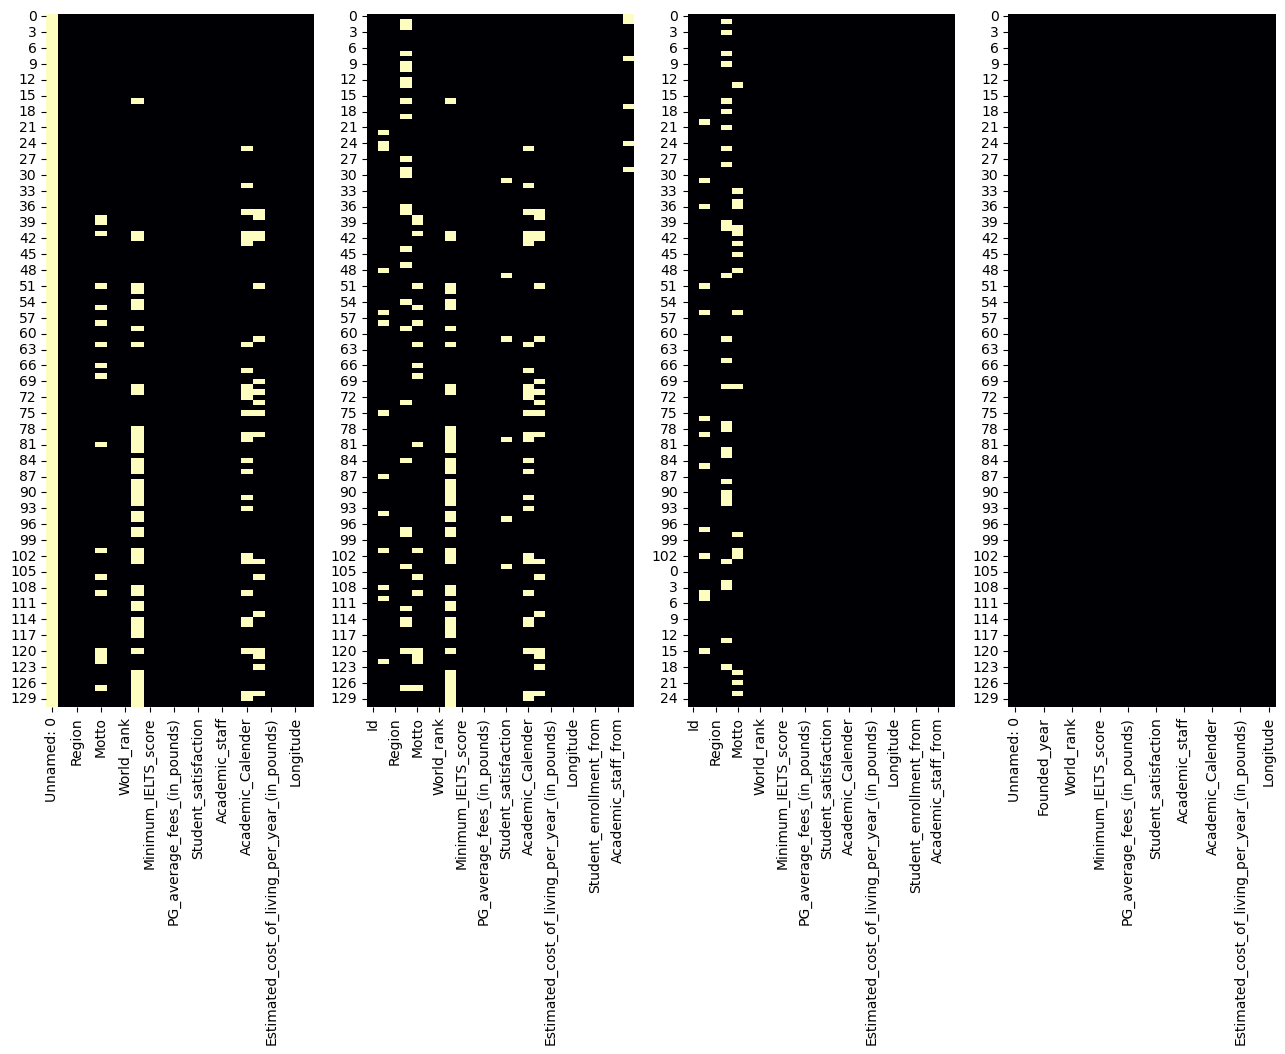

In [ ]:
plot_info_map([df_ground_truth, df_cleaned, df_preprocessed_mean, df_preprocessed_mix])

In [ ]:
def print_diff(A, B):
    print(set(A).symmetric_difference(set(B)))
    
print_diff(df_ground_truth, df_cleaned)
print_diff(df_ground_truth, df_preprocessed_mean)
print_diff(df_ground_truth, df_preprocessed_mix)

{'Academic_staff_to', 'Student_enrollment_from', 'Academic_staff', 'Id', 'Student_enrollment_to', 'Unnamed: 0', 'Student_enrollment', 'Academic_staff_from'}
{'Academic_staff_to', 'Student_enrollment_from', 'Academic_staff', 'Id', 'Student_enrollment_to', 'Unnamed: 0', 'Student_enrollment', 'Academic_staff_from'}
{'University_name', 'Website', 'Motto'}


In [ ]:
# drop unused columns
if 'Motto' in df_ground_truth.columns:
    df_ground_truth.drop(columns=['Unnamed: 0', 'University_name', 'Motto', 'Website', 'Student_enrollment', 'Academic_staff'], inplace=True)
    df_cleaned.drop(columns=['University_name', 'Motto', 'Website', 'Student_enrollment_from', 'Student_enrollment_to', 'Academic_staff_from', 'Academic_staff_to'], inplace=True)
    df_preprocessed_mean.drop(columns=['University_name', 'Motto', 'Website', 'Student_enrollment_from', 'Student_enrollment_to', 'Academic_staff_from', 'Academic_staff_to'], inplace=True)
    df_preprocessed_median.drop(columns=['University_name', 'Motto', 'Website', 'Student_enrollment_from', 'Student_enrollment_to', 'Academic_staff_from', 'Academic_staff_to'], inplace=True)
    df_preprocessed_mix.drop(columns=['Unnamed: 0', 'Student_enrollment', 'Academic_staff'], inplace=True)
    
# display_info([df_ground_truth, df_cleaned, df_preprocessed_mean])
display_na([df_ground_truth, df_cleaned, df_preprocessed_mean, df_preprocessed_median, df_preprocessed_mix],
         ['gt', 'cleaned', 'preprocessed_mean', 'preprocessed_median', 'preprocessed_mix'])

(131, 16)


,gt,cleaned,preprocessed_mean,preprocessed_median,preprocessed_mix
Region,0.0,0,0,0,0.0
Founded_year,0.0,28,28,28,0.0
UK_rank,0.0,0,0,0,0.0
World_rank,0.0,0,0,0,0.0
CWUR_score,47.0,47,0,0,0.0
Minimum_IELTS_score,0.0,0,0,0,0.0
UG_average_fees_(in_pounds),0.0,0,0,0,0.0
PG_average_fees_(in_pounds),0.0,0,0,0,0.0
International_students,0.0,0,0,0,0.0
Student_satisfaction,0.0,6,0,0,0.0


In [ ]:
print_diff(df_ground_truth, df_cleaned)
print_diff(df_ground_truth, df_preprocessed_mean)
print_diff(df_ground_truth, df_preprocessed_mix)

{'Id'}
{'Id'}
set()


In [ ]:
# merge id
index_col = 'Id'
unique_col = 'Latitude'
if index_col not in df_ground_truth.columns:
    df_join_id = df_preprocessed_mean.loc[:,[index_col, unique_col]]
    df_ground_truth = df_ground_truth.merge(df_join_id, on=unique_col)
    df_preprocessed_mix = df_preprocessed_mix.merge(df_join_id, on=unique_col)

    display(df_join_id.head(n=1))

display(df_ground_truth.head(n=1))
display(df_preprocessed_mean.head(n=1))
display(df_preprocessed_mix.head(n=1))

,Id,Latitude
0,20,52.9388


,Region,Founded_year,UK_rank,World_rank,CWUR_score,Minimum_IELTS_score,UG_average_fees_(in_pounds),PG_average_fees_(in_pounds),International_students,Student_satisfaction,Control_type,Academic_Calender,Campus_setting,Estimated_cost_of_living_per_year_(in_pounds),Latitude,Longitude,Id
0,East of England,1209,1,4,94.1,6.5,21750,23187,0.202,0.855,Public,Trimesters,Urban,12000,52.2054,0.1132,0


,Id,Region,Founded_year,UK_rank,World_rank,CWUR_score,Minimum_IELTS_score,UG_average_fees_(in_pounds),PG_average_fees_(in_pounds),International_students,Student_satisfaction,Control_type,Academic_Calender,Campus_setting,Estimated_cost_of_living_per_year_(in_pounds),Latitude,Longitude
0,20,East Midlands,1948.0,21,143,80.4,5.5,14140,14420,0.182,0.78,Public,Semesters,Suburban,9840,52.9388,-1.1981


,Region,Founded_year,UK_rank,World_rank,CWUR_score,Minimum_IELTS_score,UG_average_fees_(in_pounds),PG_average_fees_(in_pounds),International_students,Student_satisfaction,Control_type,Academic_Calender,Campus_setting,Estimated_cost_of_living_per_year_(in_pounds),Latitude,Longitude,Id
0,East of England,1209.0,1,4,94.1,6.5,21750,23187,0.202,0.855,Public,Trimesters,Urban,12000,52.2054,0.1132,0


In [ ]:
def print_unique_col(df):
    rows = len(df)
    idx_mask = df.nunique() == rows
    print(sorted(df.columns[idx_mask]))
    
print_unique_col(df_ground_truth)
print_unique_col(df_cleaned)
print_unique_col(df_preprocessed_mean)
print_unique_col(df_preprocessed_mix)

['Id', 'Latitude', 'Longitude']
['Id', 'Latitude', 'Longitude']
['Id', 'Latitude', 'Longitude']
['Id', 'Latitude', 'Longitude']


In [ ]:
print_diff(df_ground_truth, df_cleaned)
print_diff(df_ground_truth, df_preprocessed_mean)
print_diff(df_ground_truth, df_preprocessed_mix)

set()
set()
set()


In [ ]:
# order values
index_col = 'Id'

df_ground_truth.set_index(index_col, inplace=True)
df_cleaned.set_index(index_col, inplace=True)
df_preprocessed_mean.set_index(index_col, inplace=True)
df_preprocessed_median.set_index(index_col, inplace=True)
df_preprocessed_mix.set_index(index_col, inplace=True)

df_ground_truth.sort_index(inplace=True)
df_cleaned.sort_index(inplace=True)
df_preprocessed_mean.sort_index(inplace=True)
df_preprocessed_median.sort_index(inplace=True)
df_preprocessed_mix.sort_index(inplace=True)

In [ ]:
unique_col = 'Latitude'
display(df_ground_truth[unique_col].compare(df_preprocessed_mix[unique_col], result_names=('gt', 'mix')))
display(df_ground_truth[unique_col].compare(df_preprocessed_mix[unique_col], result_names=('gt', 'mix')))
display(df_ground_truth[unique_col].compare(df_preprocessed_mix[unique_col], result_names=('gt', 'mix')))

,gt,mix
Id,,


,gt,mix
Id,,


,gt,mix
Id,,


In [ ]:
def print_na_col(df):
    idx_mask = df.isna().sum() != 0
    print(sorted(df.columns[idx_mask]))
    
print_na_col(df_ground_truth)
print_na_col(df_cleaned)
print_na_col(df_preprocessed_mean)
print_na_col(df_preprocessed_mean)
print_na_col(df_preprocessed_mix)

['Academic_Calender', 'CWUR_score', 'Campus_setting']
['Academic_Calender', 'CWUR_score', 'Campus_setting', 'Founded_year', 'Student_satisfaction']
['Founded_year']
['Founded_year']
[]


In [ ]:
display_na([df_ground_truth, df_cleaned, df_preprocessed_mean, df_preprocessed_median, df_preprocessed_mix],
         ['gt', 'cleaned', 'preprocessed_mean', 'preprocessed_median', 'preprocessed_mix'])

(131, 16)


,gt,cleaned,preprocessed_mean,preprocessed_median,preprocessed_mix
Region,0,0,0,0,0
Founded_year,0,28,28,28,0
UK_rank,0,0,0,0,0
World_rank,0,0,0,0,0
CWUR_score,47,47,0,0,0
Minimum_IELTS_score,0,0,0,0,0
UG_average_fees_(in_pounds),0,0,0,0,0
PG_average_fees_(in_pounds),0,0,0,0,0
International_students,0,0,0,0,0
Student_satisfaction,0,6,0,0,0


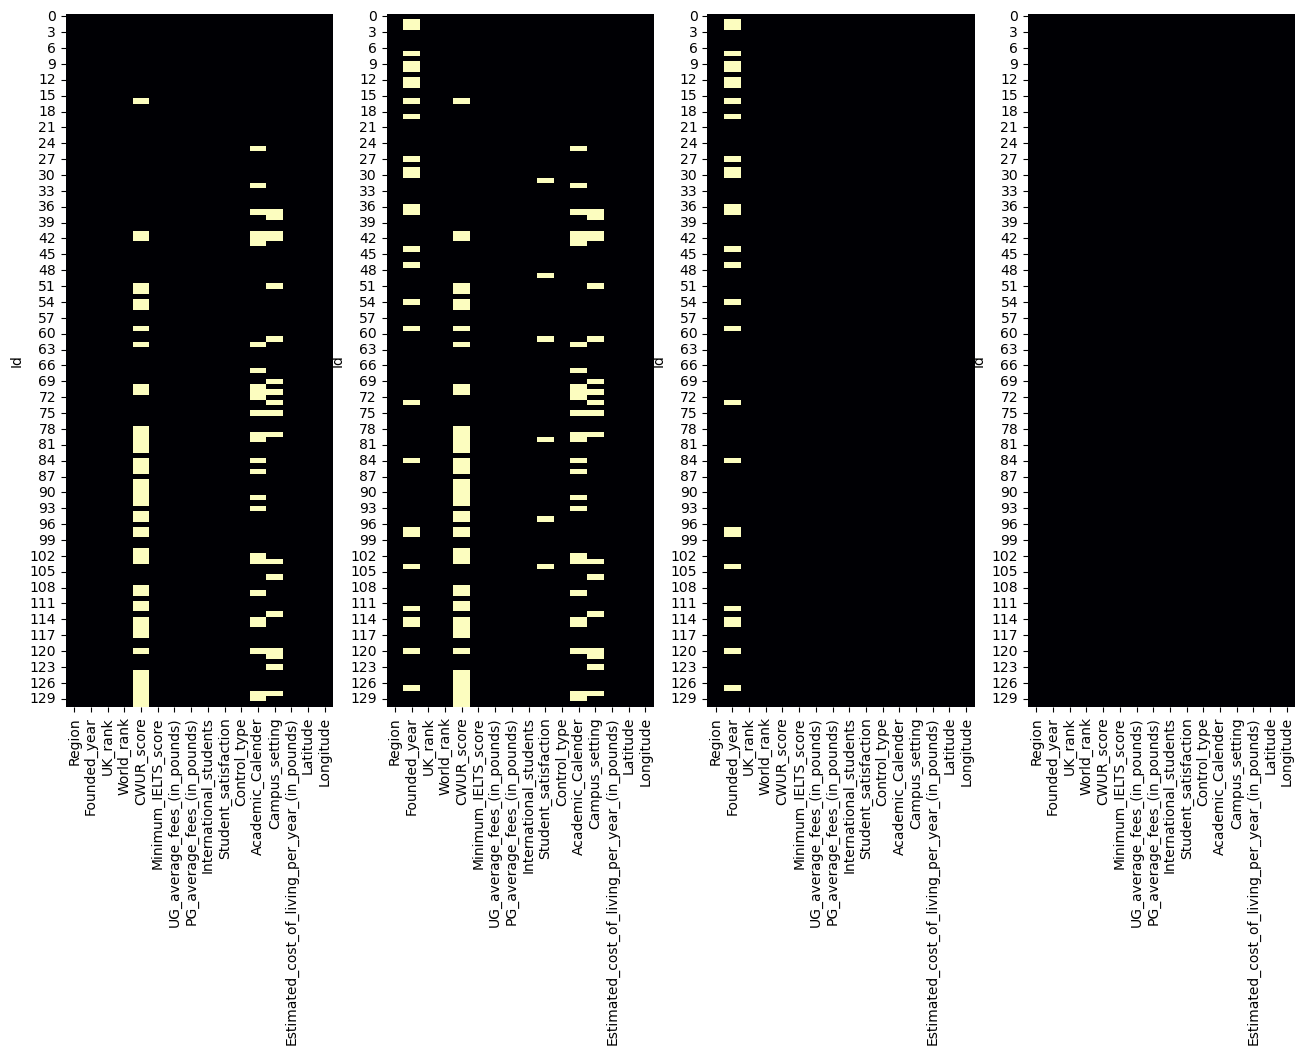

In [ ]:
plot_info_map([df_ground_truth, df_cleaned, df_preprocessed_mean, df_preprocessed_mix])

# Analyses

Columns to compare:
1. Student_satisfaction
2. Founded_year (only for preprocessed_mix)

Columns that can not be compared, since they also miss in the ground truth
1. CWUR_score
2. Academic_Calender
3. Campus_setting

In [ ]:
def display_df_diff(df1: pd.DataFrame, df2: pd.DataFrame, col: str):
    # df_ground_truth[col].compare(df_preprocessed_mix[col], result_names=('gt', 'mix'))
    mask = df_cleaned[col].isna()
    if df1[col].dtype != 'object':
        diff = df1[col][mask] - df2[col][mask]
        diff_perc = np.round(diff / df1[col][mask], 2)
    else:
        diff = None
        diff_perc = None
    df_diff = pd.DataFrame({
        'gt': df1[col][mask],
        'mix': df2[col][mask],
        'diff': diff,
        'diff_perc': diff_perc
    })
    # df_diff.sort_values('gt', inplace=True)
    print("{:} / {:} values differ".format(np.sum(diff != 0), len(diff)))
    print("diff indices: {}".format(df_diff[diff != 0].index.tolist()))
    display(df_diff)

display_df_diff(df_ground_truth, df_preprocessed_mix, col='Founded_year')

9 / 28 values differ
diff indices: [16, 19, 54, 59, 73, 97, 104, 112, 120]


,gt,mix,diff,diff_perc
Id,,,,
1,1096,1096.0,0.0,0.00
2,1413,1413.0,0.0,0.00
7,1964,1964.0,0.0,0.00
9,1965,1965.0,0.0,0.00
10,1966,1966.0,0.0,0.00
12,1904,1904.0,0.0,0.00
13,1900,1900.0,0.0,0.00
16,2012,1901.0,111.0,0.06
19,1952,1862.0,90.0,0.05


In [ ]:
col = 'Student_satisfaction'
idx = df_ground_truth[col].compare(df_cleaned[col], result_names=('gt', 'cleaned')).index

df_info = pd.DataFrame({
    'gt': df_ground_truth[col][idx],
    'mean': df_preprocessed_mean[col][idx],
    'median': df_preprocessed_median[col][idx],
    'mix': df_preprocessed_mix[col][idx],
})

display(df_info)

,gt,mean,median,mix
Id,,,,
31,0.782,0.783206,0.7845,0.785
49,0.815,0.783206,0.7845,0.785
61,0.789,0.783304,0.7900,0.785
80,0.799,0.783304,0.7900,0.785
95,0.773,0.783206,0.7845,0.785
104,0.743,0.783304,0.7900,0.785


In [ ]:
from sklearn import metrics

def get_metric_list(s1: pd.Series, s2: pd.Series):
    y_true = s1
    y_pred = s2
    return [
        metrics.mean_squared_error(y_true, y_pred),
        metrics.mean_squared_error(y_true, y_pred, squared=False),
        metrics.mean_absolute_error(y_true, y_pred),
        metrics.r2_score(y_true, y_pred),
    ]

def build_metric_table(df_gt, df_list, row_label, col):
    idx = df_ground_truth[col].compare(df_cleaned[col], result_names=('gt', 'cleaned')).index
    index_label= ['MSE', 'RMSE', 'MAE', 'R^2']

    df_metric = pd.DataFrame(index=index_label)
    for rowName, df in zip (row_label, df_list):
        series = pd.Series(get_metric_list(df_gt[col][idx], df[col][idx]), index=index_label, name=rowName)
        df_metric = pd.concat([df_metric, series], axis=1)

    display(df_metric.round(6))


build_metric_table(df_ground_truth,
                   df_list = [df_preprocessed_mean, df_preprocessed_median, df_preprocessed_mix],
                   row_label = ['mean', 'median', 'mix'],
                   col = 'Student_satisfaction')

,mean,median,mix
MSE,0.000503,0.000560,0.000505
RMSE,0.022434,0.023663,0.022468
MAE,0.017484,0.016917,0.017500
R^2,-0.001398,-0.114160,-0.004477


In [ ]:
col = 'Student_satisfaction'
mask = df_cleaned[col].isna()
df_preprocessed_mix[col][mask]

Id
31     0.785
49     0.785
61     0.785
80     0.785
95     0.785
104    0.785
Name: Student_satisfaction, dtype: float64